In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
x = data.data
y = data.target

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape

((105, 4), (45, 4))

In [6]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_scaled = pca.fit_transform(x_scaled)
pca_scaled

array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

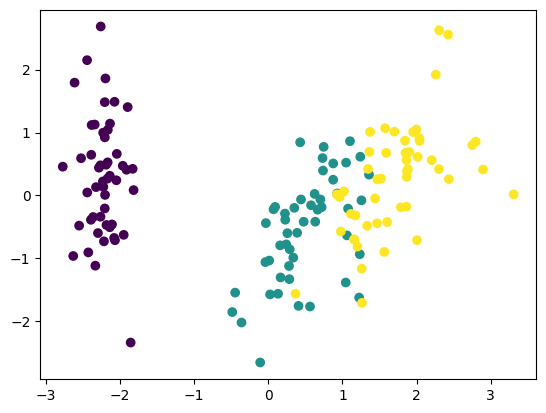

In [7]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=y)

In [8]:
# Agglomerative Clustering >> make dendrogram

Text(0, 0.5, 'Euclidean distance')

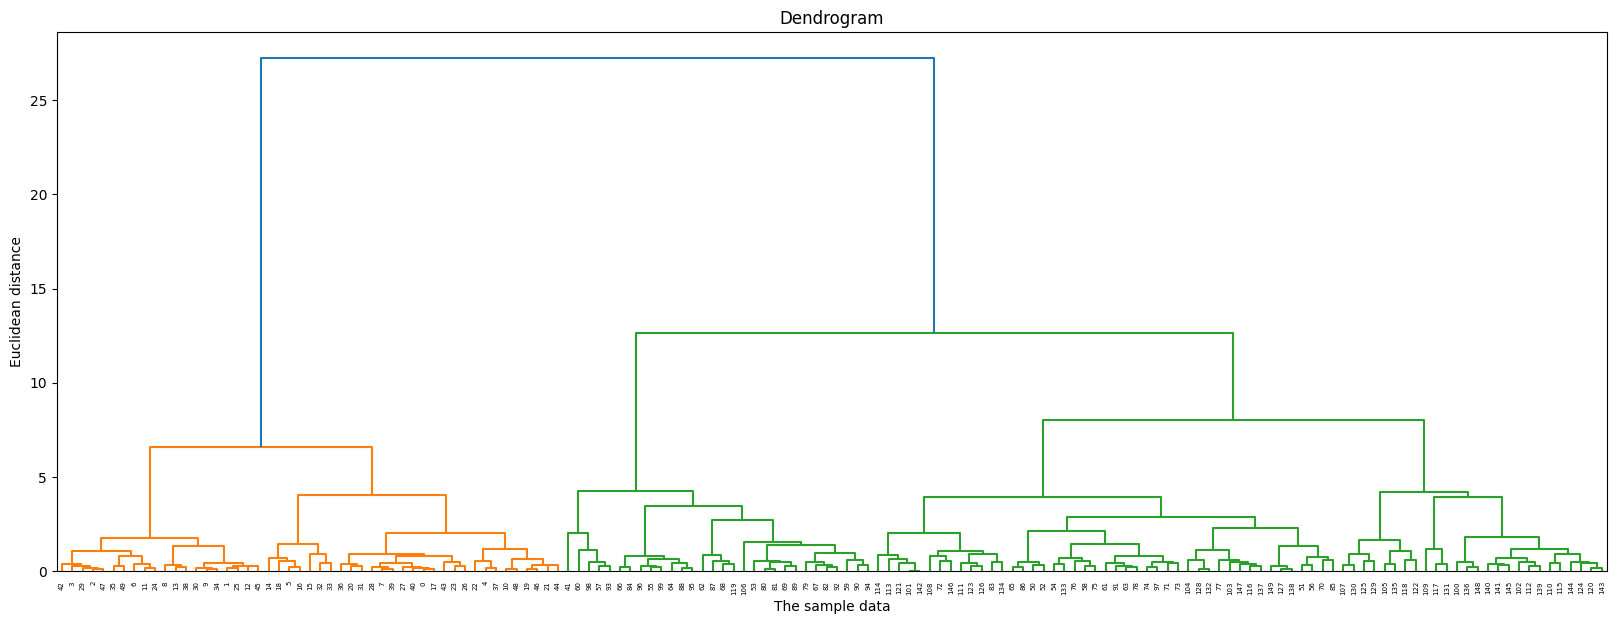

In [9]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendrogram")
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.xlabel('The sample data')
plt.ylabel('Euclidean distance')

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster

AgglomerativeClustering()

In [13]:
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [14]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

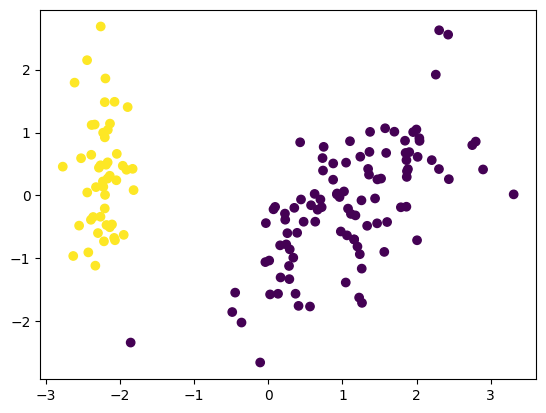

In [15]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_)

In [18]:
from sklearn.metrics import silhouette_score
silhouettescore = []
for k in range(2,10):
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    agglo.fit(x_scaled)
    score = silhouette_score(x_scaled, agglo.labels_)
    silhouettescore.append(score)
silhouettescore

[np.float64(0.5770346019475988),
 np.float64(0.4466890410285909),
 np.float64(0.4006363159855973),
 np.float64(0.33058726295230545),
 np.float64(0.31485480100512825),
 np.float64(0.316969830299128),
 np.float64(0.310946529007258),
 np.float64(0.31143422475471655)]